# Loading

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPT: make shortcut of the BT4012 Project folder inside your google drive so the stuff below works
drive.mount("/content/drive")
trainData = pd.read_csv("/content/drive/My Drive/BT4012 Project/fraudTrain.csv")
testData = pd.read_csv("/content/drive/My Drive/BT4012 Project/fraudTest.csv")
# trainData = pd.read_csv(r"E:\AY2022-23 Semester 1 Modules\BT4012 - Fraud Analytics\Project Dataset\fraudTrain.csv")
# testData = pd.read_csv(r"E:\AY2022-23 Semester 1 Modules\BT4012 - Fraud Analytics\Project Dataset\fraudTest.csv")

allData = pd.concat([trainData, testData])

Mounted at /content/drive


In [2]:
def age_group(row):
    rows = row["age"]
    if rows <20:
        return "less than 20"
    elif rows >=20 and rows<30:
        return "20 to 30"
    elif rows >=30 and rows<40:
        return "30 to 40"
    elif rows >=40 and rows<50:
        return "40 to 50"
    elif rows >=50 and rows<60:
        return "50 to 60"
    elif rows >=60 and rows<70:
        return "60 to 70"
    elif rows >=70 and rows<80:
        return "70 to 80"
    elif rows >=80 and rows<90:
        return "80 to 90"
    else:
        return "greater than 90"

In [3]:
from sklearn.model_selection import train_test_split

# age grp
allData["age"] = pd.DatetimeIndex(allData["trans_date_trans_time"]).year-pd.DatetimeIndex(allData["dob"]).year
allData["age_group"] = allData.apply(age_group,axis=1)

# trans times / age
allData["trans_hour"] = pd.DatetimeIndex(allData["trans_date_trans_time"]).hour
allData["trans_yrmth"] = pd.DatetimeIndex(allData['trans_date_trans_time']).strftime('%Y-%m')

allData["weekday"] = pd.DatetimeIndex(allData["trans_date_trans_time"]).weekday

# drop redundant index column
allData.drop(labels="Unnamed: 0", axis=1, inplace=True)

# calculating the distance between the merchant location and transaction location
allData["latitude_difference"] = abs(allData["lat"]-allData["merch_lat"])
allData["longitude_difference"] = abs(allData["long"]-allData["merch_long"])

# it is estimated that difference between each degree of longitude and lattitude is approximately 69 miles which is 110 km
# applying pythogoras theorem
allData["distance"] = np.sqrt(pow(allData["latitude_difference"]*110,2)+pow(allData["longitude_difference"]*110,2))
allData['distance'].describe()

allData.category = allData.category.astype("category")
allData.gender = allData.gender.astype("category")
allData.state = allData.state.astype("category")
allData.age_group = allData.age_group.astype("category")
allData.trans_yrmth = allData.trans_yrmth.astype("category")
allData.weekday = allData.weekday.astype("category")
allData.job = allData.job.astype("category")
allData.city = allData.city.astype("category")
allData.is_fraud = allData.is_fraud.astype("category")
allData.trans_hour = allData.trans_hour.astype("category")

# category_dummies = pd.get_dummies(allData.category)
# allData = pd.concat([allData, category_dummies], axis=1)

train, others = train_test_split(allData, test_size=0.2, random_state=4012)
del(allData)
validation, test = train_test_split(others, test_size=0.5, random_state=4012)
del(others)

onlyFraud = train[train.is_fraud == 1]
noFraud = train[train.is_fraud != 1]

print(onlyFraud)

       trans_date_trans_time            cc_num  \
288598   2019-05-21 23:40:29  6011438889172900   
644699   2019-10-01 01:45:49   346208242862904   
366597   2019-06-19 01:11:01  6506116513503136   
621562   2019-09-21 17:41:09  3565943051129759   
10057    2019-01-07 04:34:48  3597980945245815   
...                      ...               ...   
205282   2019-04-15 03:05:13  3548710338694745   
389704   2020-11-21 03:17:38    30235268718158   
204807   2020-09-01 01:10:19  4003989662068504   
93343    2019-02-24 22:33:25   180036456789979   
351029   2019-06-14 00:17:50  6011948324228984   

                                  merchant       category     amt      first  \
288598                fraud_Abbott-Steuber  personal_care   20.17    Allison   
644699                   fraud_Collier Inc    grocery_net   10.54    Tabitha   
366597               fraud_Dooley-Thompson       misc_net  773.63   Kimberly   
621562                     fraud_Lynch Ltd   shopping_pos  905.66      David   

# Dropping

In [4]:
train.drop(["trans_date_trans_time", "first", "last", "unix_time", "street", "cc_num", "merchant", "age", "city_pop", "zip", "dob", "trans_num"], axis=1, inplace=True)
train.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"], axis=1, inplace=True)

validation.drop(["trans_date_trans_time", "first", "last", "unix_time", "street", "cc_num", "merchant", "age", "city_pop", "zip", "dob", "trans_num"], axis=1, inplace=True)
validation.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"], axis=1, inplace=True)

test.drop(["trans_date_trans_time", "first", "last", "unix_time", "street", "cc_num", "merchant", "age", "city_pop", "zip", "dob", "trans_num"], axis=1, inplace=True)
test.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"], axis=1, inplace=True)

train

,category,amt,gender,city,state,job,is_fraud,age_group,trans_hour,trans_yrmth,weekday,distance
1089385,shopping_net,9.11,M,Pembroke,NC,Hospital doctor,0,60 to 70,7,2020-03,6,88.270416
396245,gas_transport,75.57,F,Centerview,MO,Electronics engineer,0,30 to 40,1,2019-06,6,117.115063
816379,misc_net,390.37,M,Oakland,TN,Furniture conservator/restorer,0,20 to 30,5,2019-12,6,56.383604
476241,shopping_pos,96.55,F,Lakeport,CA,Podiatrist,0,40 to 50,12,2020-12,0,108.142655
567642,kids_pets,13.78,M,San Antonio,TX,Exhibition designer,0,40 to 50,20,2019-08,3,98.590270
...,...,...,...,...,...,...,...,...,...,...,...,...
1286615,misc_pos,6.88,F,Sutherland,NE,Insurance broker,0,30 to 40,23,2020-06,1,62.997041
926319,shopping_net,98.85,F,Steuben,ME,Make,0,60 to 70,3,2020-01,3,122.501992
83164,misc_pos,10.48,F,Tulsa,OK,Bookseller,0,50 to 60,9,2020-07,0,82.202315
301454,travel,6.45,F,Allentown,PA,"Scientist, research (maths)",0,20 to 30,23,2019-05,6,22.751546


# Models

In [5]:
from math import sqrt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Track the performance of various models
performance_tracker = pd.DataFrame(columns=["Model Name", "Training Time", "Accuracy", "Recall", "Precision", "F1", "ROC AUC"])

# Always predict No Default
y_pred = pd.Series(0).repeat(validation.is_fraud.size)
performance_tracker.loc["Naive Model (Always No Default)"] = ["Naive Model (Always No Default)", 0.0, accuracy_score(validation.is_fraud, y_pred), recall_score(validation.is_fraud, y_pred), precision_score(validation.is_fraud, y_pred), f1_score(validation.is_fraud, y_pred), roc_auc_score(validation.is_fraud, y_pred)]

# Always predict Default
y_pred = pd.Series(1).repeat(validation.is_fraud.size)
performance_tracker.loc["Naive Model (Always Default)"] = ["Naive Model (Always Default)", 0.0, accuracy_score(validation.is_fraud, y_pred), recall_score(validation.is_fraud, y_pred), precision_score(validation.is_fraud, y_pred), f1_score(validation.is_fraud, y_pred), roc_auc_score(validation.is_fraud, y_pred)]

performance_tracker

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model Name,Training Time,Accuracy,Recall,Precision,F1,ROC AUC
Naive Model (Always No Default),Naive Model (Always No Default),0.0,0.994726,0.0,0.000000,0.000000,0.5
Naive Model (Always Default),Naive Model (Always Default),0.0,0.005274,1.0,0.005274,0.010493,0.5


# Actual LGBM on Test Set

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
import time
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

x_train = train[train.columns[~train.columns.isin(["is_fraud"])]]
x_test = test[test.columns[~test.columns.isin(["is_fraud"])]]

# Define the model pipeline
model = LGBMClassifier(class_weight="balanced", random_state=4012, num_leaves=30, n_estimators=1215)

# Train the model
time_start = time.perf_counter()

model.fit(x_train, train.is_fraud, eval_set=[(x_test, test.is_fraud), (x_train, train.is_fraud)], verbose=20)

training_time = time.perf_counter() - time_start
training_time

# Generate predictions on test data
y_pred = pd.Series(model.predict(x_test))
y_pred

# Evaluate and record model performance
performance_tracker.loc["LGBM"] = ["LGBM", training_time, accuracy_score(test.is_fraud, y_pred), recall_score(test.is_fraud, y_pred), precision_score(test.is_fraud, y_pred), f1_score(test.is_fraud, y_pred), roc_auc_score(test.is_fraud, y_pred)]
performance_tracker

[20]	training's binary_logloss: 0.120808	valid_0's binary_logloss: 0.128118
[40]	training's binary_logloss: 0.0479215	valid_0's binary_logloss: 0.0561773
[60]	training's binary_logloss: 0.0268787	valid_0's binary_logloss: 0.0339906
[80]	training's binary_logloss: 0.0151133	valid_0's binary_logloss: 0.0195409
[100]	training's binary_logloss: 0.0104604	valid_0's binary_logloss: 0.0141985
[120]	training's binary_logloss: 0.00743934	valid_0's binary_logloss: 0.0106394
[140]	training's binary_logloss: 0.0055682	valid_0's binary_logloss: 0.00840192
[160]	training's binary_logloss: 0.00426175	valid_0's binary_logloss: 0.00681286
[180]	training's binary_logloss: 0.00333362	valid_0's binary_logloss: 0.00568626
[200]	training's binary_logloss: 0.00272138	valid_0's binary_logloss: 0.00494976
[220]	training's binary_logloss: 0.0022642	valid_0's binary_logloss: 0.00444904
[240]	training's binary_logloss: 0.00190482	valid_0's binary_logloss: 0.004063
[260]	training's binary_logloss: 0.00159865	valid

,Model Name,Training Time,Accuracy,Recall,Precision,F1,ROC AUC
Naive Model (Always No Default),Naive Model (Always No Default),0.00000,0.994726,0.000000,0.000000,0.000000,0.500000
Naive Model (Always Default),Naive Model (Always Default),0.00000,0.005274,1.000000,0.005274,0.010493,0.500000
LGBM,LGBM,287.32703,0.999325,0.933884,0.936788,0.935334,0.966777


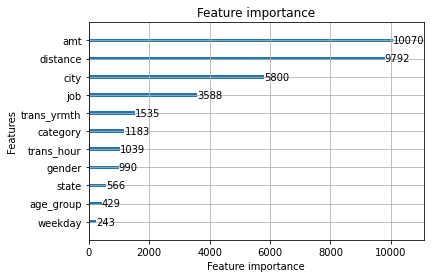

In [7]:
from lightgbm import plot_importance
plot_importance(model)

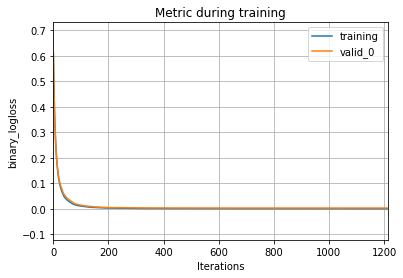

In [8]:
from lightgbm import plot_metric
plot_metric(model)

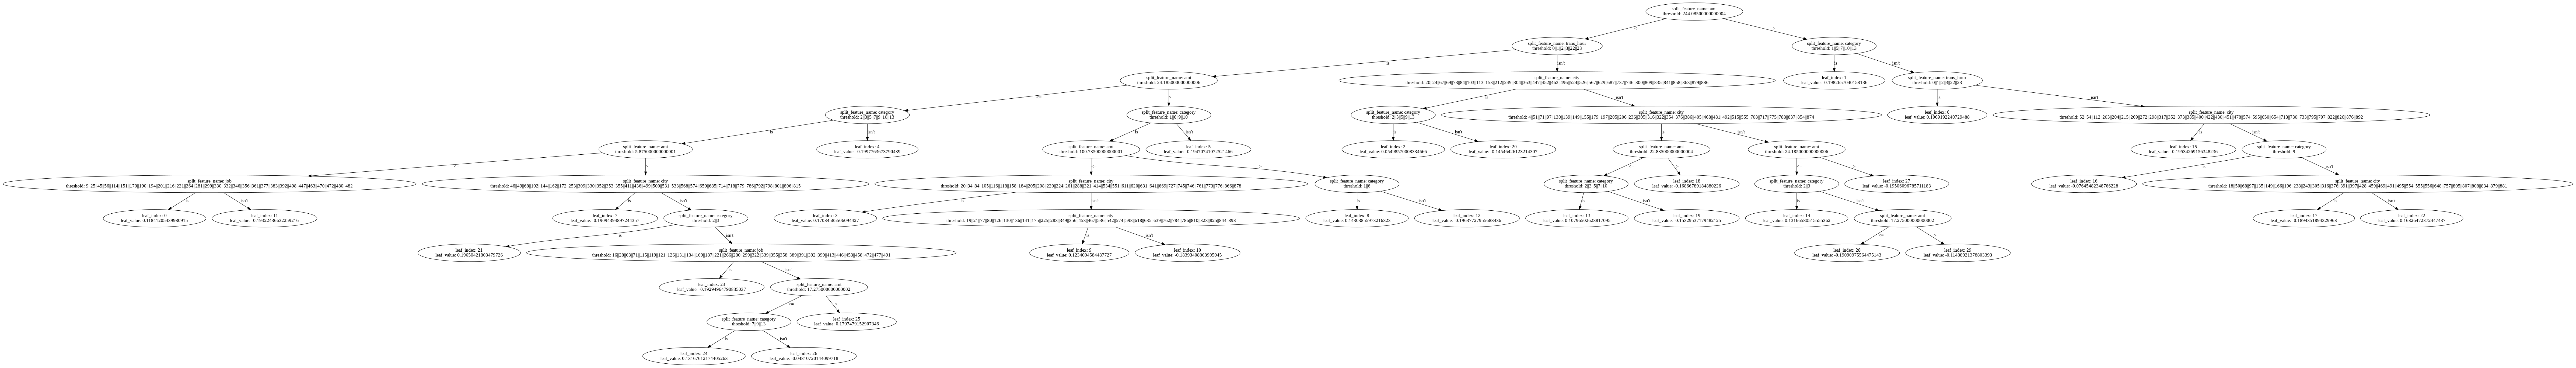

In [10]:
from lightgbm import plot_tree
plot_tree(model, figsize=(200,30))

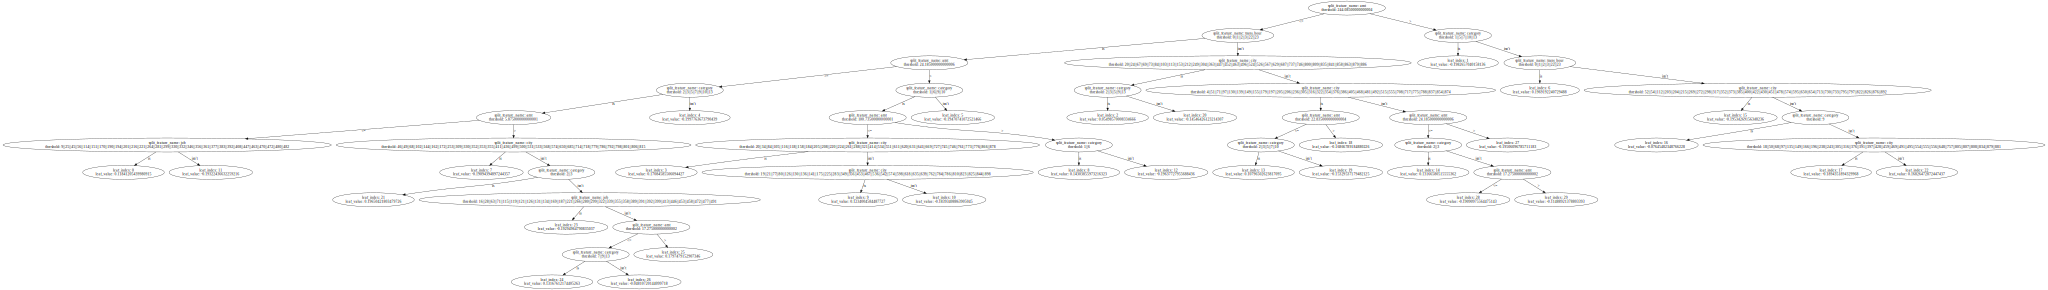

In [9]:
from lightgbm import create_tree_digraph
create_tree_digraph(model)

In [11]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.7 MB/s 


In [12]:
import shap

# explainer = shap.TreeExplainer(search.best_estimator_.named_steps["lgbm_classifier"])
explainer = shap.TreeExplainer(model)

In [13]:
shap_values = explainer.shap_values(test[test.columns[~test.columns.isin(["is_fraud"])]])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [14]:
shap_values_df = pd.DataFrame(shap_values[1], columns="shap_" + test[test.columns[~test.columns.isin(["is_fraud"])]].columns)
X_test_with_shap = pd.concat([test[test.columns[~test.columns.isin(["is_fraud"])]].reset_index(drop=True), shap_values_df], axis=1)
X_test_with_shap

,category,amt,gender,city,state,job,age_group,trans_hour,trans_yrmth,weekday,...,shap_amt,shap_gender,shap_city,shap_state,shap_job,shap_age_group,shap_trans_hour,shap_trans_yrmth,shap_weekday,shap_distance
0,personal_care,20.22,F,Bristol,PA,"Administrator, charities/voluntary organisations",30 to 40,13,2019-03,2,...,8.236170,-0.136534,0.769431,0.201599,0.223654,-0.272948,-0.580824,0.630531,1.640730,-0.515923
1,shopping_pos,2.44,F,Rossville,IL,"Buyer, retail",40 to 50,23,2020-01,0,...,0.491079,-0.323754,1.394447,0.036690,1.923885,-0.589487,1.824389,-0.063472,0.618010,0.346672
2,travel,9.40,M,Ballwin,MO,"Engineer, communications",less than 20,20,2020-04,4,...,5.121889,0.201734,-3.995656,0.829377,-1.122614,-0.460383,-1.136594,-0.606950,0.323937,-0.355533
3,shopping_pos,109.35,F,Gadsden,AL,Physiological scientist,50 to 60,1,2020-07,6,...,2.446045,-0.156795,-1.038163,-1.454707,1.622076,0.253585,-0.157493,-1.262584,-0.336473,-0.075010
4,home,58.90,M,Detroit,MI,Trading standards officer,70 to 80,22,2019-12,6,...,-2.468735,0.099141,-1.370054,-0.750385,1.018499,0.471434,3.168463,0.186510,0.314158,-0.358981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185235,misc_net,4.08,F,Cromona,KY,Chief Financial Officer,50 to 60,7,2019-09,0,...,1.429810,-0.367700,0.352045,0.030781,0.510634,1.344531,-1.195785,0.280944,-0.982875,-0.085746
185236,home,24.91,F,Jelm,WY,Public librarian,40 to 50,18,2020-11,0,...,1.790083,-0.102486,0.112589,-0.025614,1.021091,-0.200759,-1.008472,0.161716,-1.345189,-0.049747
185237,personal_care,129.96,F,Issaquah,WA,Osteopath,30 to 40,15,2019-02,2,...,2.353178,-0.086329,-1.451595,-0.074818,0.300878,-0.103817,-0.322280,0.171544,0.360898,-0.145926
185238,shopping_net,211.84,F,Baton Rouge,LA,"Designer, furniture",40 to 50,15,2020-10,2,...,3.415649,-0.481527,-1.799307,-0.582972,-0.397239,-0.956778,-0.820065,-0.368621,0.505859,-0.629976


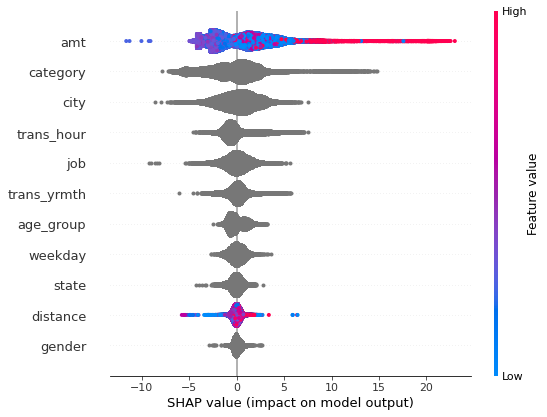

In [15]:
shap.summary_plot(shap_values=shap_values[1], features=test[test.columns[~test.columns.isin(["is_fraud"])]], plot_type="dot")

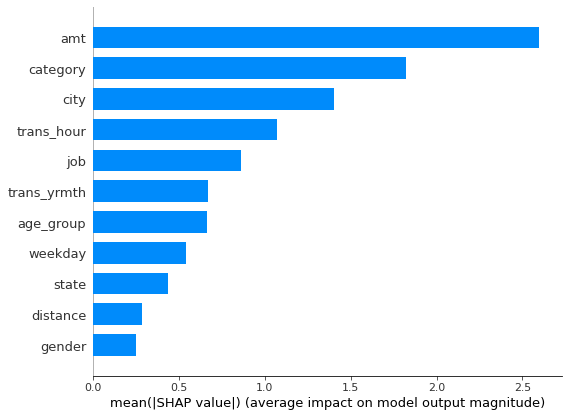

In [16]:
shap.summary_plot(shap_values=shap_values[1], features=test[test.columns[~test.columns.isin(["is_fraud"])]], plot_type="bar")

In [17]:
X_test_with_shap.groupby(["trans_hour"])["shap_trans_hour"].agg(["mean"]).sort_values(by="mean", ascending=False)

,mean
trans_hour,
23,3.133676
22,2.979889
0,1.525349
2,1.408149
3,1.169108
1,1.022881
13,-0.158381
5,-0.282706
12,-0.285627


In [18]:
X_test_with_shap.groupby(["category"])["shap_category"].agg(["mean"]).sort_values(by="mean", ascending=False)

,mean
category,
misc_pos,1.488443
food_dining,1.126068
kids_pets,1.041810
gas_transport,0.866046
personal_care,0.759541
health_fitness,0.636595
grocery_net,0.467477
travel,-0.288776
home,-0.524411


In [19]:
import ipywidgets as widgets
from ipywidgets import interact

@interact
def shap_decision_plot(Customer=widgets.IntSlider(value=0, min=0, max=len(test[test.columns[~test.columns.isin(["is_fraud"])]].index)-1, step=1)):
    actual = test.is_fraud.iloc[Customer]
    predicted = y_pred.iloc[Customer]
    error = "True" if actual == predicted else "False"
    pos_neg = "Positive" if predicted == 1 else "Negative"
    shap.decision_plot(explainer.expected_value[1], shap_values[1][Customer,:], test[test.columns[~test.columns.isin(["is_fraud"])]].iloc[Customer,:], link="logit")
    print("Actual Default = " + str(actual) + ", Predicted Default = " + str(predicted) + " (" + error + " " + pos_neg + ")")

interactive(children=(IntSlider(value=0, description='Customer', max=185239), Output()), _dom_classes=('widget…